# Step 1: Environment setup

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing


In [ ]:
# import the dataset
from tensorflow.keras.datasets import mnist

In [ ]:
# loading the dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


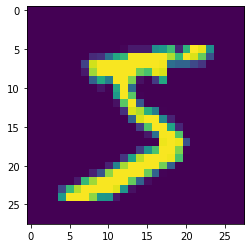

In [ ]:
# show a image from the dataset
plt.imshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train.max(),x_train.mean(),x_train.min()

(255, 33.318421449829934, 0)

In [ ]:
y_train.max(),y_train.min(),y_train.mean()

(9, 0, 4.4539333333333335)

In [ ]:
# Normalizing the images
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
# check the effect of normalization
x_train.max(),x_train.mean(),x_train.min()

(1.0, 0.1306604762738429, 0.0)

In [ ]:
# check shape
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# converting the above shpae in 3 dimension cause convolutional classes received 3D input
x_train=x_train.reshape(60000, 28, 28,1)
x_test=x_test.reshape(10000, 28, 28)

# Step 3: Build the model


In [ ]:
#define the object
model=tf.keras.models.Sequential()

In [ ]:
# Adding the 1st conv. layer(input)
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[28,28,1]))


In [ ]:
# Adding the 2nd conv. layer(input)
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))


In [ ]:
# Adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [ ]:
# Adding the Dropout layer
model.add(tf.keras.layers.Dropout(.3))

In [ ]:
# Adding flattening layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
# Adding output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 1)                 9217      
                                                        

# Step 4: Compile the model


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

# Step 5: Train the model

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 121s 258ms/step - loss: 2.3409 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3043 - val_sparse_categorical_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 120s 255ms/step - loss: 2.3018 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3011 - val_sparse_categorical_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 120s 256ms/step - loss: 2.3013 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3010 - val_sparse_categorical_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 120s 256ms/step - loss: 2.3013 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3010 - val_sparse_categorical_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 120s 256ms/step - loss: 2.3014 - sparse_categorical_accuracy: 0.1124 - val_loss: 2.3010 - val_sparse_categorical_accuracy: 0.1135
Epoch 6/10
469/469 [==============================] - 120s 256ms/step - loss: 2.

In [ ]:
def learning_rate(history,epoch):
  # training vs validation accuracy
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','val'])
  plt.show()

   
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Train','val'])
  plt.show()

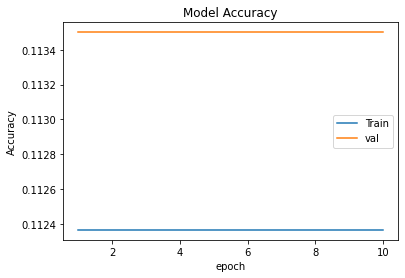

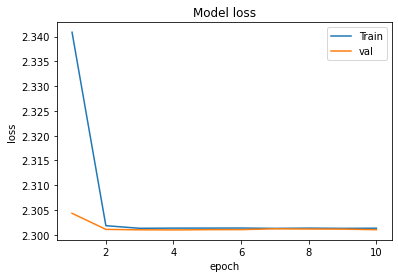

In [ ]:
learning_rate(history,10)